<a href="https://colab.research.google.com/github/ykitaguchi77/Laboratory_course/blob/master/14.%20YOLO%E3%82%92%E7%94%A8%E3%81%84%E3%81%9F%E7%89%A9%E4%BD%93%E6%A4%9C%E7%9F%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLOv5を用いた物体検出
GPU使用推奨

https://github.com/ultralytics/yolov5

In [1]:
!ls

sample_data


In [3]:
import os
!git clone https://github.com/ultralytics/yolov5  # clone
os.chdir("/content/yolov5")
!pip install -r requirements.txt  # install

fatal: destination path 'yolov5' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.8/702.8 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # or yolov5n - yolov5x6, custom

# Images
img = ['https://ultralytics.com/images/zidane.jpg']  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
#results.show()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-1-23 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 159MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
WA

In [ ]:
# 座標
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,743.290527,48.343597,1141.756470,720.000000,0.879861,0,person
1,441.989624,437.336670,496.585083,710.036255,0.675118,27,tie
2,123.051178,193.238007,714.690430,719.771240,0.666694,0,person
3,978.989807,313.579468,1025.302856,415.526184,0.261517,27,tie


In [ ]:
# 信頼度
results.pandas().xyxy[0].confidence

0    0.879861
1    0.675118
2    0.666694
3    0.261517
Name: confidence, dtype: float64

In [ ]:
# 画像を表示
results.show()

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



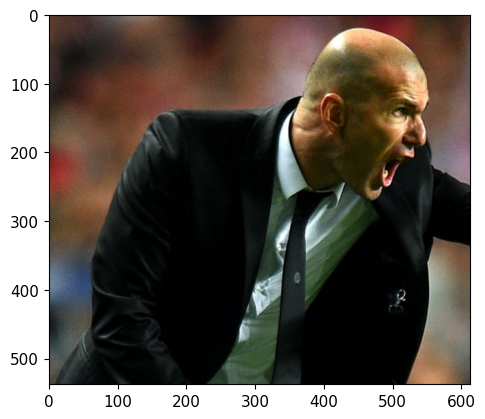

In [ ]:
# 画像をクロップ
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

cropped_image = results.crop()[1]['im']
cropped_image = cropped_image[:,:,::-1] #BGR to RGB https://qiita.com/ikanamazu/items/3e6337fa2c477992ee8d
#貼り付け
plt.imshow(cropped_image)
#表示
plt.show()

#手持ちの画像で物体検知

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('/content/gdrive/My Drive/AI_laboratory_course/bokujyou.jpg'))

image 1/1: 364x485 5 persons, 1 cow
Speed: 21.7ms pre-process, 14.0ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)


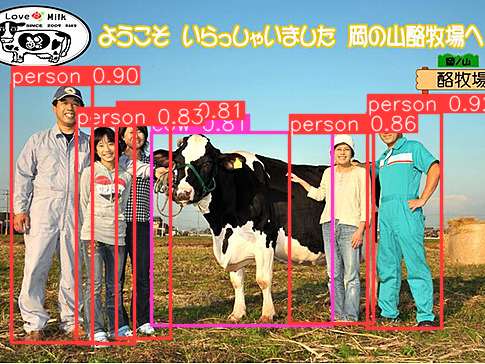

In [ ]:
# Images
img = ['/content/gdrive/My Drive/AI_laboratory_course/bokujyou.jpg']  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
results.show()

# **動画を判定してみよう**

### 動画のダウンロード

In [ ]:
!pip install youtube-dl
!pip install yt-dlp
!pip install ffmpeg
#!python -m pip install -U yt-dlp

#from __future__ import unicode_literals
import youtube_dl
import pandas as pd
from yt_dlp import YoutubeDL


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 6.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 6.2 MB/s 
     |████████████████████████████████| 193 kB 75.7 MB/s 
     |████████████████████████████████| 2.3 MB 49.1 MB/s 
     |████████████████████████████████| 357 kB 77.1 MB/s 
     |████████████████████████████████| 106 kB 76.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=61f3f67ef09498a6e0e53adcf0e3da12f1df5a995ae2d62ee7ab1bdd52a986cc
  Stored in directory: /root/.cache/pip/wheels/30/33/46/5ab7eca55b9490dddbf3441c68a29535996270ef1ce8b9b6d7
Successfully built ffmpeg


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils

Cloning into 'yolov5'...
remote: Enumerating objects: 14867, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 14867 (delta 2), reused 2 (delta 0), pack-reused 14858
Receiving objects: 100% (14867/14867), 13.93 MiB | 25.29 MiB/s, done.
Resolving deltas: 100% (10224/10224), done.
/content/yolov5


In [ ]:
ydl_opts = {
        #'format': 'bestvideo+bestaudio/best',
        'format': 'mp4',
        'outtmpl': "sample_movie.mp4"
    }

with YoutubeDL(ydl_opts) as ydl:
    url_list = ["https://www.youtube.com/watch?v=9TCFGhtv1-Q"] #リストを直接入力する場合
    ydl.download(url_list)

[youtube] 9TCFGhtv1-Q: Downloading webpage
[youtube] 9TCFGhtv1-Q: Downloading android player API JSON
[info] 9TCFGhtv1-Q: Downloading 1 format(s): 22
[download] Destination: sample_movie.mp4
[download] 100% of    3.91MiB in 00:00:00 at 5.03MiB/s   


In [ ]:
!python detect.py --weights yolov5s.pt  --conf 0.25 --source "/content/yolov5/sample_movie.mp4"


detect: weights=['yolov5s.pt'], source=/content/yolov5/sample_movie.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-48-g5f8054c Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
video 1/1 (1/430) /content/yolov5/sample_movie.mp4: 640x384 4 persons, 1 bus, 13.0ms
video 1/1 (2/430) /content/yolov5/sample_movie.mp4: 640x384 5 persons, 1 bus, 10.0ms
video 1/1 (3/430) /content/yolov5/sample_movie.mp4: 640x384 4 persons, 1 bus, 9.6ms
video 1/1 (4/430) /content/yolov5/sample_movie.mp4: 640x384 5 persons, 1 bus, 10.0ms
video 1/1 (5/430) /content